#Import libraries

In [ ]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from scipy import ndimage as ndi
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage import data
from skimage.filters import rank
from skimage.util import img_as_ubyte
import warnings
warnings.filterwarnings("ignore")

#Unzip Datasets

In [ ]:
!unzip "/content/drive/MyDrive/cv images/cv7.zip" -d "/content/"

Archive:  /content/drive/MyDrive/cv images/cv7.zip
  inflating: /content/market.jpg     
  inflating: /content/fingerprint4.png  
  inflating: /content/fingerprint3.png  
  inflating: /content/Colors.png     
  inflating: /content/Pisa.jpg       
  inflating: /content/panda.jpeg     
  inflating: /content/hawamahal1.jpg  
  inflating: /content/hawamahal2.jpg  
  inflating: /content/Crop images - for extra credit problem/Jan_29_Window1_102.tif  
  inflating: /content/Crop images - for extra credit problem/Jan_22_Entry_2.tif  
  inflating: /content/Crop images - for extra credit problem/Feb_18_Window_1_102.tif  
  inflating: /content/fingerprint5.png  


#2.

##a. Erosion and Dialation

In [ ]:

def erosionandialation(img_name):
    img = cv2.imread(img_name, 0)
    _, img_thres = cv2.threshold(img,0,255,cv2.THRESH_OTSU)
    kernel = np.ones((5,5))
    erosion = cv2.erode(img_thres,kernel,iterations = 1)
    dilation = cv2.dilate(img_thres,kernel,iterations = 1)
    fig, axs = plt.subplots(2,2, figsize = (10,6))

    axs[0,0].imshow(img, cmap ='gray')
    axs[0,0].set_title("Original image")

    axs[0,1].imshow(img_thres, cmap = 'gray')
    axs[0,1].set_title("After clarity image")

    axs[1,0].imshow(erosion, cmap = 'gray')
    axs[1,0].set_title("Erosion image")

    axs[1,1].imshow(dilation, cmap = 'gray')
    axs[1,1].set_title("Dilation image")

    plt.show()
    return erosion, dilation

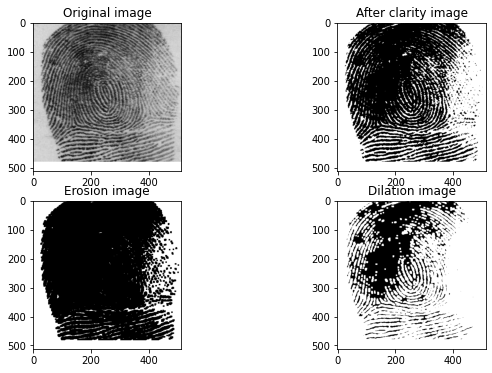

In [ ]:
_ = erosionandialation('fingerprint3.png')

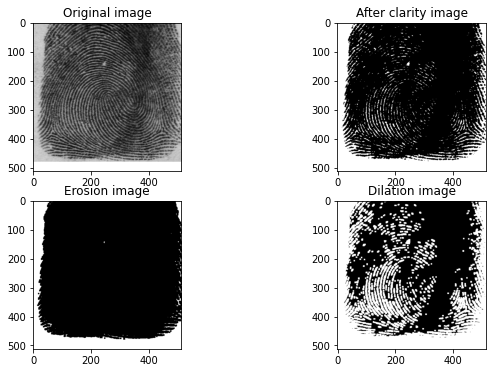

In [ ]:
_ = erosionandialation('fingerprint4.png')

##2.b.
 Opening and closing

In [ ]:
img = cv2.imread('fingerprint5.png', 0)
_, img_thres = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
img_inv = 255 - img
_, img_inv_thres = cv2.threshold(img_inv, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [ ]:
def openingandclosing(img, kernel, name):
    _, img_thres = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
    
    opening = cv2.morphologyEx(img_thres, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(img_thres, cv2.MORPH_CLOSE, kernel)
    fig, axs = plt.subplots(1,4, figsize = (15,6))

    axs[0].imshow(img, cmap ='gray')
    axs[0].set_title("Original image")

    axs[1].imshow(img_thres, cmap = 'gray')
    axs[1].set_title(f"Thresholded binary image of {name}")

    axs[2].imshow(opening,  cmap = 'gray')
    axs[2].set_title(f"Opening of {name}")

    axs[3].imshow(closing,  cmap = 'gray')
    axs[3].set_title(f"closing of {name}")

    plt.show()
    return

In [ ]:
img = cv2.imread('fingerprint5.png', 0)
img_inv = 255 - img

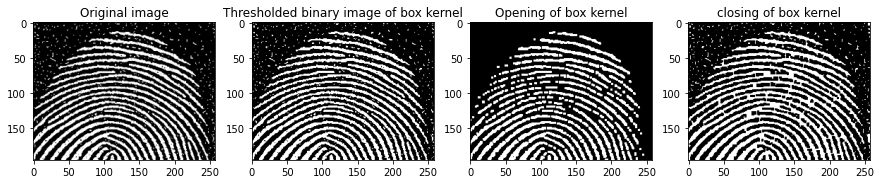

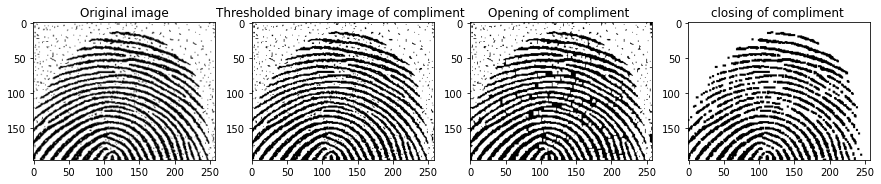

In [ ]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
openingandclosing(img, kernel1, 'box kernel')
openingandclosing(img_inv, kernel1, 'compliment ')

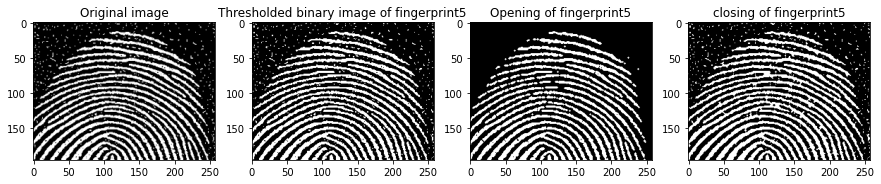

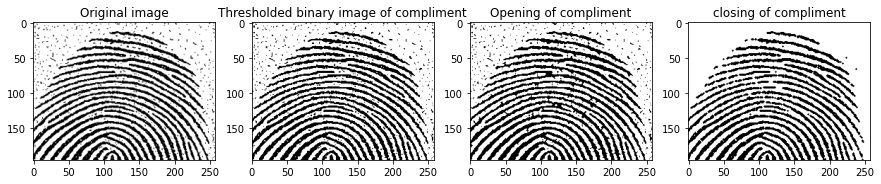

In [ ]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
openingandclosing(img, kernel2, 'fingerprint5')
openingandclosing(img_inv, kernel2, 'compliment')

##2.c
K Means

In [ ]:
img = cv2.imread('market.jpg')
z = img.reshape((-1,3))
z = np.float32(z)

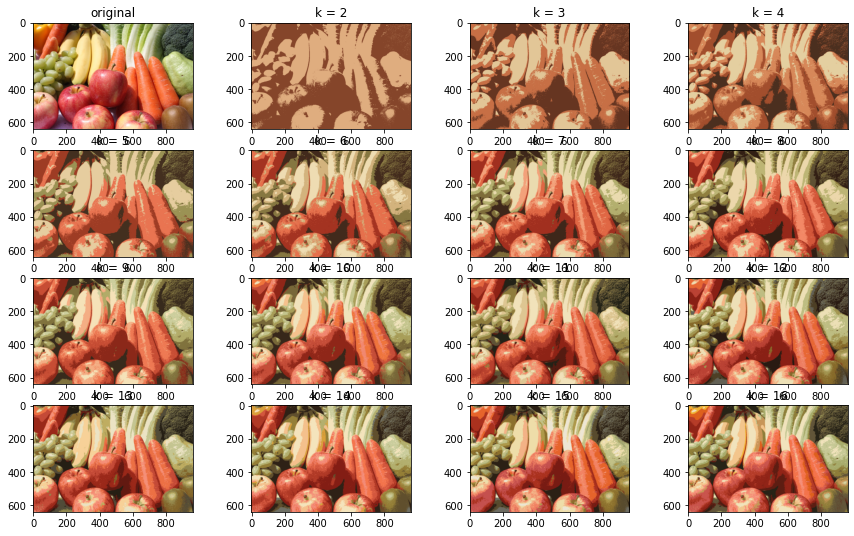

In [ ]:
output_imgs = dict()
for k in range(2,17):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness,labels,centers = cv2.kmeans(z,k,None,criteria,10,flags)
    centers = np.uint8(centers)
    out = centers[labels.flatten()]
    out = out.reshape((img.shape))
    output_imgs[k] = out

fig, axs = plt.subplots(4,4, figsize = (15,9))
i, j = 0, 0

axs[i,j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[i,j].set_title('original')

j += 1
for k in range(2,17):
    out = output_imgs[k]

    axs[i,j].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    axs[i,j].set_title(f'k = {k}')

    j +=1
    if j>3:
        i +=1
        j = 0
plt.show()

In [ ]:
img = cv2.imread('Pisa.jpg')
z = img.reshape((-1,3))
z = np.float32(z)

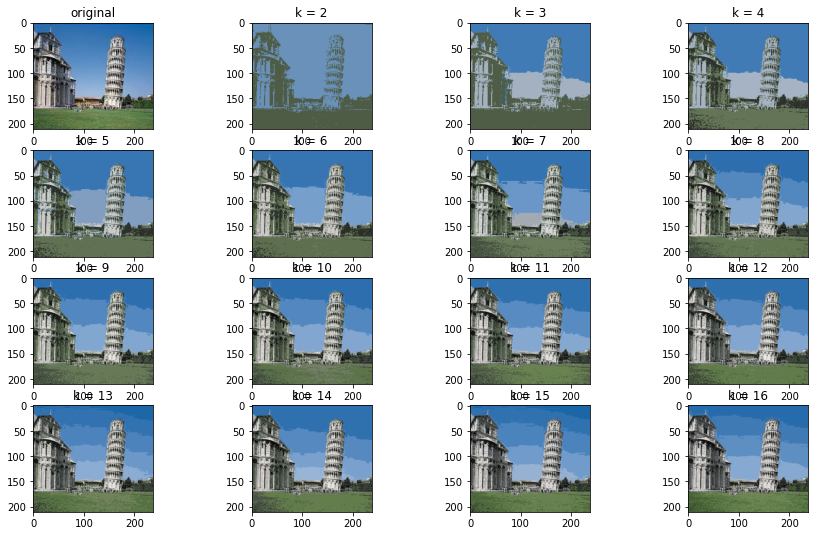

In [ ]:
output_imgs = dict()
for k in range(2,17):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    flags = cv2.KMEANS_RANDOM_CENTERS
    compactness,labels,centers = cv2.kmeans(z,k,None,criteria,10,flags)
    centers = np.uint8(centers)
    out = centers[labels.flatten()]
    out = out.reshape((img.shape))
    output_imgs[k] = out

fig, axs = plt.subplots(4,4, figsize = (15,9))
i, j = 0, 0

axs[i,j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[i,j].set_title('original')

j += 1
for k in range(2,17):
    out = output_imgs[k]

    axs[i,j].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    axs[i,j].set_title(f'k = {k}')

    j +=1
    if j>3:
        i +=1
        j = 0
plt.show()

##2.d
Superpixels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

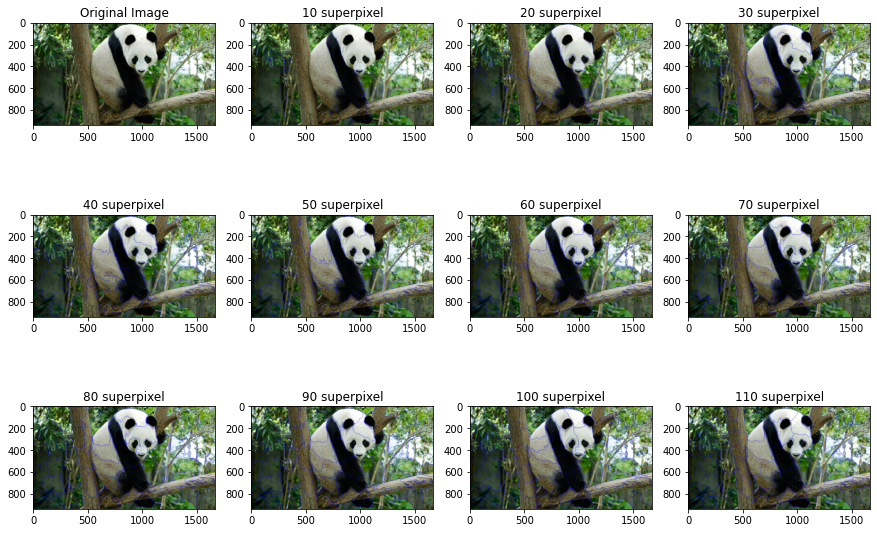

In [ ]:
img = img_as_float(io.imread("panda.jpeg"))
fig, axs = plt.subplots(3,4,figsize=(15,10))

axs[0,0].imshow(img)
axs[0,0].set_title('Original Image')

i,j = 0,1

for superpixel in range(10,120, 10):
    segment = slic(img, n_segments= superpixel, sigma=5)
    axs[i,j].imshow(mark_boundaries(img, segment, color = (0,0,255)))
    axs[i,j].set_title(f"{superpixel} superpixel")
    j+=1
    if j==4:
        j=0
        i+=1

plt.show()

From the plots we see that after about 50 superpixel segments, the segmentation gives an idea of the image without losing meaning. However, the more superpixels we consider the more details we get.

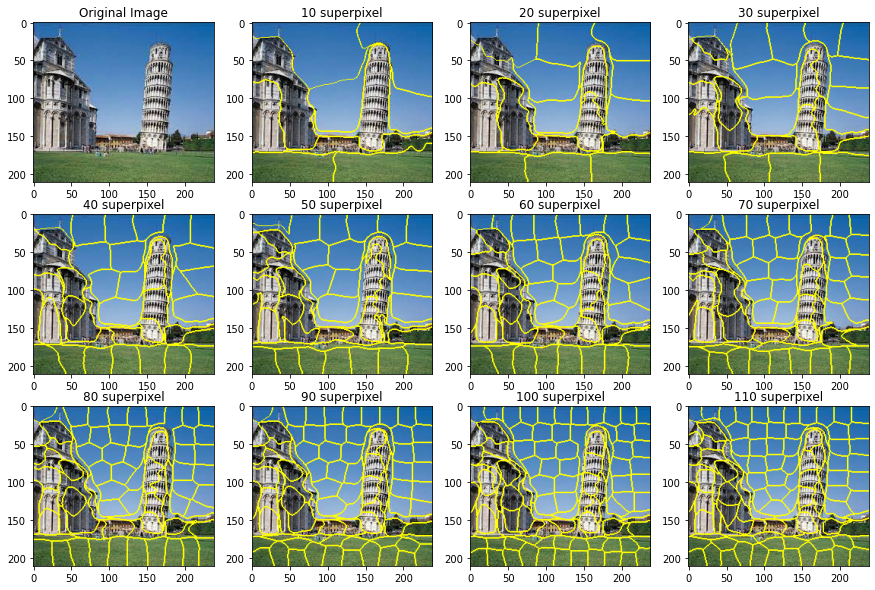

In [ ]:
img = img_as_float(io.imread("Pisa.jpg"))
fig, axs = plt.subplots(3,4,figsize=(15,10))

axs[0,0].imshow(img)
axs[0,0].set_title('Original Image')

i,j = 0,1

for superpixel in range(10,120, 10):
    segment = slic(img, n_segments= superpixel, sigma=5)
    axs[i,j].imshow(mark_boundaries(img, segment))
    axs[i,j].set_title(f"{superpixel} superpixel")
    j+=1
    if j==4:
        j=0
        i+=1

plt.show()

The more superpixels we consider the more segments are considered and for 10 superpixel segments we get a very good segmentation.

##2.e.
Watershed

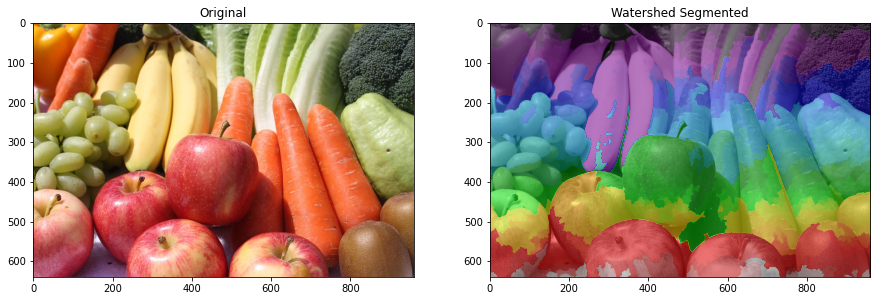

In [ ]:
img = cv2.imread('market.jpg')
out = img_as_ubyte(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
# denoise image
denoised = rank.median(out, disk(2))
# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]
# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))
# process the watershed
labels = watershed(gradient, markers)
fig, axs = plt.subplots(1,2, figsize = (15,10))
axs[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
axs[0].set_title("Original")
axs[1].imshow(out, cmap=plt.cm.gray)
axs[1].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
axs[1].set_title("Watershed Segmented")

plt.show()

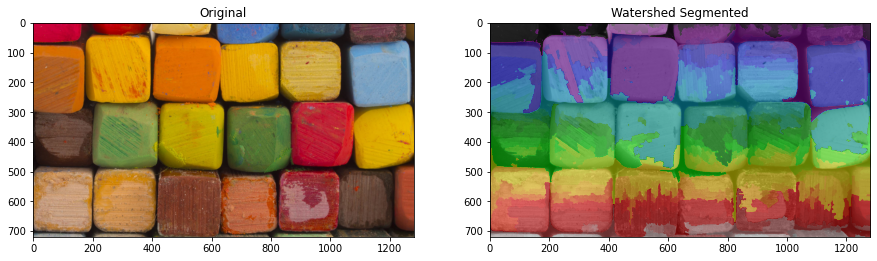

In [ ]:
img = cv2.imread('Colors.png')
out = img_as_ubyte(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
# denoise image
denoised = rank.median(out, disk(2))
# find continuous region (low gradient -
# where less than 10 for this image) --> markers
# disk(5) is used here to get a more smooth image
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]
# local gradient (disk(2) is used to keep edges thin)
gradient = rank.gradient(denoised, disk(2))
# process the watershed
labels = watershed(gradient, markers)
fig, axs = plt.subplots(1,2, figsize = (15,10))
axs[0].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
axs[0].set_title("Original")
axs[1].imshow(out, cmap=plt.cm.gray)
axs[1].imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)
axs[1].set_title("Watershed Segmented")

plt.show()

# opencv

In [ ]:
pip install -U opencv-python

     |████████████████████████████████| 60.5 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


#3. SIFT matching

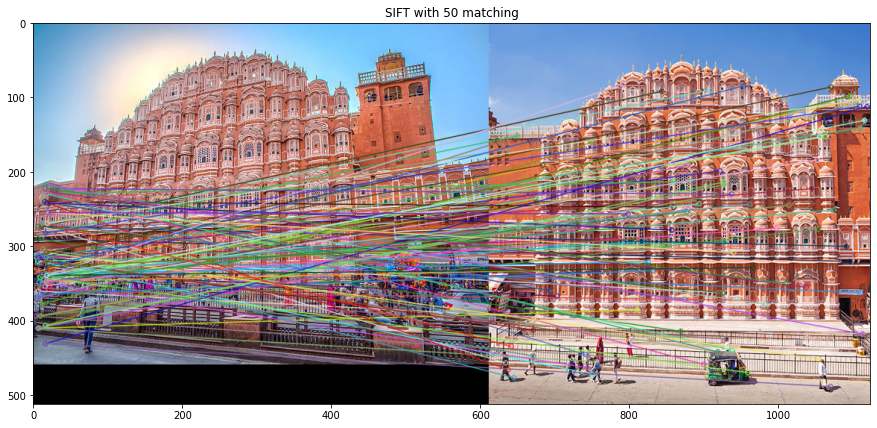

In [ ]:
img1 = cv2.imread('hawamahal1.jpg')          # queryImage
img2 = cv2.imread('hawamahal2.jpg') # trainImage
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
#matches = sorted(matches, key = lambda x:x.distance)
# Apply ratio test
good = matches[:50]
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig = plt.figure(figsize = (15,10))
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
plt.title("SIFT with 50 matching")
plt.show()